**PRÁCTICA 3. REDES NEURONALES EMPLEANDO KERAS: ESTUDIO DE HIPERPARÁMETROS MEDIANTE KERAS TUNER**

**Conceptos necesarios de teoría**:
MNIST, Inicialización de pesos, One-hot enconding, Softmax, Train-Validation-Test, Cross-entropy, SGD, Batches, Shallow/deep net, Detectar overfitting, learning rate (con decay), batch size, época, dropout, classification_report.

Despues de haber trabajado en la práctica anterior con la librería de bajo nivel denominada TensorFlow, en la presente práctica se va a introducir un framework de alto nivel para el entrenamiento de redes neuronales denominado **Keras**. Esta librería fue desarrollada por **François Chollet** en 2015 con el objetivo de **simplificar la programación de algoritmos basados en aprendizaje profundo** ofreciendo un conjunto de abstracciones más intuitivas y de alto nivel. Keras hace uso de librerías de más bajo nivel o ***backend*** por detrás, concretamente se puede escoger entre **TensorFlow,  Microsoft Cognitive Toolkit o Theano**. Debido a la buena acogida de Keras por parte de la comunidad científica, TensorFlow decide embeber dicho paquete en su versión 2.0 (con la que trabajaremos en esta práctica) y cuya release data de octubre de 2019.

**EJERCICIO 1.** En primer lugar y con el objetivo de familiarizarnos con esta nueva librería, el primer ejercicio consistirá en replicar el perceptron simple desarrollado en el último ejercicio de la práctica anterior pero esta vez **empleando Keras** en vez de TensorFlow.  Si recordaís  el objetivo que perseguía la práctica anterior era el de **clasificar el dataset de dígitos manuscritos denominado MNIST**, así que vamos a ello:

- En primer lugar analiza cada instrucción del siguiente bloque de código, que tiene como objetivo el importar y preparar los datos de MNIST para poder pasarlos por la red neuronal. Para ello comenta cada una de las instrucciones que se llevan a cabo. Es muy recomendable que hagas uso de la documentación de **Keras** y **sklearn**.

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# ??? Comentar
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_te, y_te) = mnist.load_data()
# ??? Comentar
x_train, x_te = x_train / 255.0, x_te / 255.0
# ??? Comentar
y_train = to_categorical(y_train)
y_te = to_categorical(y_te)
# ??? Comentar
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

- Examina ahora las dimensiones del conjunto de entrenamiento y del conjunto de test y ajusta el código de inspección del dataset de la práctica anterior (función ```display_digit```) para visualizar algunos ejemplos del subset de training de manera aleatoria.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ",x_tr.shape)
print("Las etiquetas de entrenamiento tiene dimensiones: ",y_tr.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("Las etiquetas de entrenamiento tiene dimensiones: ",y_val.shape)
print("El conjunto de test tiene dimensiones: ",x_te.shape)
print("Las etiquetas de entrenamiento tiene dimensiones: ",y_te.shape)

El conjunto de entrenamiento tiene dimensiones:  (54000, 28, 28)
Las etiquetas de entrenamiento tiene dimensiones:  (54000, 10)
El conjunto de validación tiene dimensiones:  (6000, 28, 28)
Las etiquetas de entrenamiento tiene dimensiones:  (6000, 10)
El conjunto de test tiene dimensiones:  (10000, 28, 28)
Las etiquetas de entrenamiento tiene dimensiones:  (10000, 10)


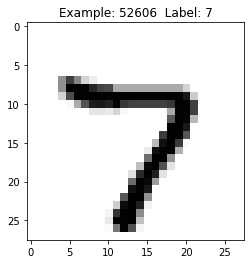

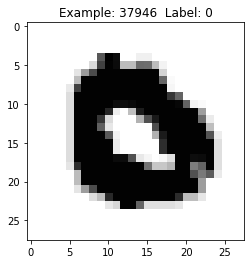

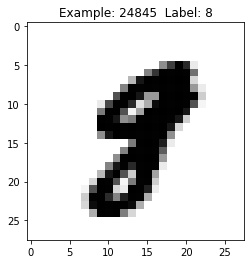

In [9]:
# Método para visualizar los datos de entrenamiento
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:,:]
  # Seleccionar el target num de mnist.train.labels (Recuerda que esta en one-hot encoding, conviertelo a decimal con argmax)
  label = np.argmax(y_train[num])
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_tr.shape[0]))
display_digit(np.random.randint(0, x_tr.shape[0]))
display_digit(np.random.randint(0, x_tr.shape[0]))

**EJERCICIO 2.** Una vez visualizadas ciertas muestras de nuestro conjunto de datos,  vamos a entrenar un **perceptrón simple** (como el que desarrollamos la primera sesión mediante numpy y en la segunda práctica empleando TensorFlow) empleando el *framework* de alto nivel **Keras**. Para está primera implementación utilizando el Keras, emplearemos las siguientes herramientas tal y como hemos visto en el apartado teórico:

- Construcción de la aruitectura MLP: API Secuencial, Capa Flatten y capa Dense
- Compilar modelo y entrenarlo empleando como optimizador el SGD: Métodos ```compile``` y ```fit``` del objeto de la clase Sequential.
- Con el modelo ya entrenado, obtener las predicciones para el subset de test mediante la instrucción ```predict``` del objeto de la clase Sequential.
- Evaluar el performance del modelo empleando el método ```classification_report``` de la librería **scikit-learn**.
- Gráficar las curvas de entrenamiento (losses y accuracy) para monitorizar dicho proceso.

¿Se obtienen los mismos resultados que empleando el framework TensorFlow?¿Existe overfitting?

**Nota:** Emplea los mismos hiperparámetros que en el Ejercicio 2 de la práctica anterior.

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 3s 4ms/step - loss: 1.3289 - accuracy: 0.6845 - val_loss: 0.8804 - val_accuracy: 0.8087
Epoch 2/50
422/422 [==============================] - 3s 7ms/step - loss: 0.7463 - accuracy: 0.8345 - val_loss: 0.6613 - val_accuracy: 0.8477
Epoch 3/50
422/422 [==============================] - 2s 5ms/step - loss: 0.6089 - accuracy: 0.8560 - val_loss: 0.5709 - val_accuracy: 0.8613
Epoch 4/50
422/422 [==============================] - 2s 5ms/step - loss: 0.5428 - accuracy: 0.8669 - val_loss: 0.5197 - val_accuracy: 0.8720
Epoch 5/50
422/422 [==============================] - 2s 5ms/step - loss: 0.5026 - accuracy: 0.8734 - val_loss: 0.4863 - val_accuracy: 0.8787
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.4750 - accuracy: 0.8782 - val_loss: 0.4623 - val_accuracy: 0.8825
Epoch 7/50
422/422 [==============================] - 2s 5ms/step - loss: 0.4545 - accuracy: 0.8821 - val_loss: 0

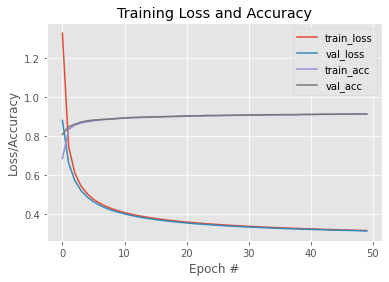

In [4]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Hiper-parámetros de nuestra red
lr = 0.005
n_epochs = 50
batch_size = 128

# Implementamos la red empleando Keras
model = Sequential() # Instancia de modelo API secuencial #(X)
model.add(Flatten(input_shape=(28,28))) #Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
model.add(Dense(10,activation = 'softmax')) # Construimos nuestro Perceptrón simple con una única capa Dense específicando las dimensiones de los datos de entrada

# Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
H = model.fit(x_tr,y_tr,validation_data = (x_val,y_val) , epochs=n_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x=x_te, batch_size=None)
predictions=np.argmax(predictions, axis=1)
y_te=np.argmax(y_te, axis=1)
print(classification_report(y_te, predictions))

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

**EJERCICIO 3.** Si todo ha ido bien vuestro perceptron simple con Keras será capaz de reconocer con una precisión en torno al 92% dígitos del 0 al 9 escritos a mano! A continuación vamos a **incluir una primera hidden layer de 200 neuronas** al perceptrón simple que hemos desarrollado en el ejercicio anterior para **descubrir el efecto de dar profundidad a nuestra red** creando ya un *multilayer perceptron*. Para ello habrá que insertar una **capa Dense con activación ReLU adicional** entre la capa de entrada (definida mediante input_shape) y la capa de salida.

Además vamos a aprovechar este ejercicio para convertir nuestro código dejado caer en un script a una función cuya cabecera será la siguiente:

```
def train_shallow_net(learning_rate, batch_size, num_epochs)
```

**Nota**: Copiad y pegad el código del Ejercicio 2 en una nueva celda y convertidlo en función. Posteriormente añadid la capa oculta.

1. Tras la modificación, se debe ejecutar la función ```train_shallow_net``` con sus parámetros de entrada tomando el valor del apartado anterior. ¿Qué sucede? **Sol.** No se percibe la influencia de hacer la red más profunda puesto que el número de épocas es pequeño para ello.

2. Ahora, lanza de nuevo el entrenamiento de nuestra shallow net pero con un valor de **```n_epochs = 200```**. ¿Que sucede ahora?¿Se aprecia la influencia de darle profundidad a la red?¿Existe overfitting?

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
422/422 [==============================] - 5s 8ms/step - loss: 1.5933 - accuracy: 0.6001 - val_loss: 1.0656 - val_accuracy: 0.7908
Epoch 2/200
422/422 [==============================] - 1s 3ms/step - loss: 0.8401 - accuracy: 0.8214 - val_loss: 0.6924 - val_accuracy: 0.8407
Epoch 3/200
422/422 [==============================] - 1s 3ms/step - loss: 0.6163 - accuracy: 0.8555 - val_loss: 0.5562 - val_accuracy: 0.8625
Epoch 4/200
422/422 [==============================] - 1s 3ms/step - loss: 0.5210 - accuracy: 0.8699 - val_loss: 0.4876 - val_accuracy: 0.8752
Epoch 5/200
422/422 [==============================] - 1s 3ms/step - loss: 0.4676 - accuracy: 0.8797 - val_loss: 0.4445 - val_accuracy: 0.8838
Epoch 6/200
422/422 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8861 - val_loss: 0.4147 - val_accuracy: 0.8902
Epoch 7/200
422/422 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8913 - val_loss: 0.3926 - val_accuracy: 0.8940

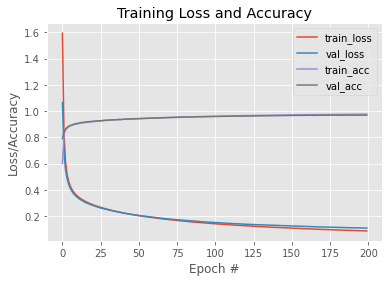

In [4]:
# Imports necesarios
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def train_shallow_net(learning_rate, batch_size, num_epochs):

  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Flatten(input_shape=(28,28))) #Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
  model.add(Dense(200,activation = 'relu'))
  model.add(Dense(10,activation = 'softmax'))

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  model.compile(optimizer=SGD(lr = learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
  

  # Entrenando la solución
  H = model.fit(x_tr,y_tr,validation_data = (x_val,y_val) , epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x=x_te, batch_size=None)
  print(classification_report(np.argmax(y_te, axis=1),np.argmax(predictions, axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

lr = 0.005
b_size = 128
n_epochs = 200

train_shallow_net(lr, b_size, n_epochs)

**EJERCICIO 4.** Tal y como se desprende del ejercicio anterior, el **número de épocas** que se establece para permitir que un experimento converja es crucial. Dicho hiperparámetro, junto con el **tamaño del batch** y la **tasa de aprendizaje**, definirá la (no) convergencia de el experimento. En este sentido, es muy importante entender las implicaciones que tiene el hiperparámetro **tamaño del batch** con los recursos hardware disponibles. Para ello, a continuación vamos a relizar **una serie de ejecuciones** empleando la función desarrollada en el apartado anterior.

- En primer lugar vamos a fijar los valos valores de **```batch_size = 128```** y **```num_epochs=15```** y vamos a realizar tres ejecuciones de nuestra red (en tres celdas distintas) con valores de **```learning_rate = 4```**, **```learning_rate = 0.1```** y **```learning_rate = 0.0001```**, respectivamente.


1.   ¿Que se puede observar? Relacionad las gráficas de pérdidas obtenidas con la gráfica que os proporcionamos en el apartado teórico de la explicación de la tasa de aprendizaje.

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 3.2562 - accuracy: 0.1126 - val_loss: 2.3113 - val_accuracy: 0.1090
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3128 - accuracy: 0.1061 - val_loss: 2.3126 - val_accuracy: 0.1040
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3111 - accuracy: 0.1045 - val_loss: 2.3077 - val_accuracy: 0.1090
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3101 - accuracy: 0.1044 - val_loss: 2.3192 - val_accuracy: 0.1055
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3107 - accuracy: 0.1023 - val_loss: 2.3073 - val_accuracy: 0.0967
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3101 - accuracy: 0.1024 - val_loss: 2.3041 - val_accuracy: 0.1055
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3133 - accuracy: 0.1039 - val_loss: 2.3137 - val_accuracy: 0.0967
Epoch 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


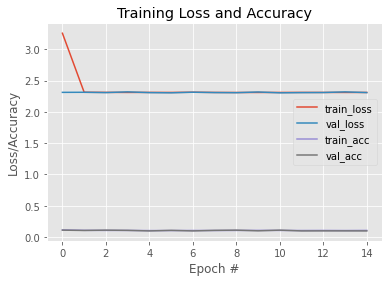

In [5]:
lr = 4
b_size = 128
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4700 - accuracy: 0.8755 - val_loss: 0.2983 - val_accuracy: 0.9140
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2628 - accuracy: 0.9263 - val_loss: 0.2338 - val_accuracy: 0.9347
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2135 - accuracy: 0.9401 - val_loss: 0.1940 - val_accuracy: 0.9465
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1803 - accuracy: 0.9499 - val_loss: 0.1741 - val_accuracy: 0.9517
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.9566 - val_loss: 0.1552 - val_accuracy: 0.9567
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1388 - accuracy: 0.9615 - val_loss: 0.1435 - val_accuracy: 0.9600
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1241 - accuracy: 0.9661 - val_loss: 0.1308 - val_accuracy: 0.9633
Epoch 

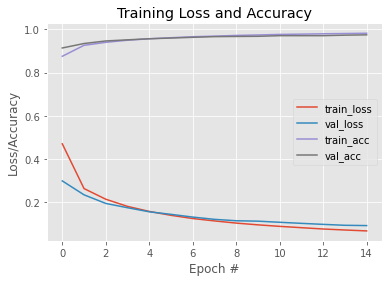

In [6]:
lr = 0.1
b_size = 128
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3681 - accuracy: 0.1119 - val_loss: 2.3359 - val_accuracy: 0.1142
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3107 - accuracy: 0.1191 - val_loss: 2.2828 - val_accuracy: 0.1247
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 2.2593 - accuracy: 0.1319 - val_loss: 2.2344 - val_accuracy: 0.1405
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 2.2121 - accuracy: 0.1513 - val_loss: 2.1896 - val_accuracy: 0.1617
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 2.1680 - accuracy: 0.1772 - val_loss: 2.1473 - val_accuracy: 0.1928
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 2.1263 - accuracy: 0.2103 - val_loss: 2.1069 - val_accuracy: 0.2312
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 2.0864 - accuracy: 0.2493 - val_loss: 2.0682 - val_accuracy: 0.2738
Epoch 

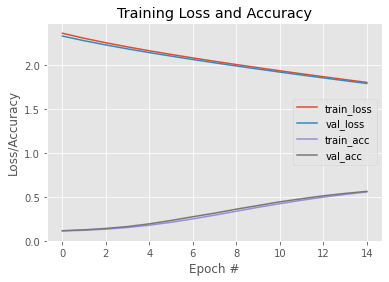

In [8]:
lr = 0.0001
b_size = 128
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

- En segundo lugar, **vamos a fijar la mejor tasa de aprendizaje de las obtenidas anteriormente** (obviando los valores de learning rate que propicien *overfitting*), es decir,  **```learning_rate = 0.1```**. El número de épocas lo mantenemos en **```num_epochs=15```** (para observar los resultados en un tiempo permisible) y vamos a realizar **cuatro ejecuciones de nuestra red** (en cuatro celdas distintas) con valores de **```batch_size = 32```**, **```batch_size = 256```**, **```batch_size = 2048```** y  **```batch_size = 8192```** respectivamente.
 

1.   ¿Que se puede observar atendiento al apartado temporal?¿Que influencia tiene el batch size en el tiempo de ejecución?¿Por que sucede esto? --> Cuanto mayor es el tamaño del batch, más rápido funciona el algoritmo. El tamaño del batch define cuantas muestras se le pasa al algoritmo en cada iteración de aprendizaje. Si utilizamos un tamaño del batch pequeño, el algoritmo realiza el backpropagation un mayor número de veces que si el tamaño del batch es alto y se pasan pocos paquetes, ya que se realizará el backpropagation tantas veces como paquetes se pasen.

2.   ¿Que ocurre para un **```batch_size = 32```** desde el punto de vista de la clasificación? ¿Que parámetro se podría variar para evitar este suceso negativo? 

3. ¿Que ocurre para un **```batch_size = 8192```** desde el punto de vista de la clasificación?¿Que parámetro/s se podría/n variar para mejorar el aprendizaje?

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3210 - accuracy: 0.9046 - val_loss: 0.1870 - val_accuracy: 0.9447
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1504 - accuracy: 0.9554 - val_loss: 0.1739 - val_accuracy: 0.9515
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9630 - val_loss: 0.1391 - val_accuracy: 0.9620
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9700 - val_loss: 0.1639 - val_accuracy: 0.9580
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0919 - accuracy: 0.9739 - val_loss: 0.1520 - val_accuracy: 0.9597
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.1692 - val_accuracy: 0.9622
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0788 - accuracy: 0.9772 - val_loss: 0.1520 - val_accuracy:

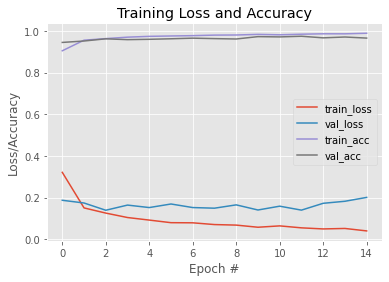

In [13]:
lr = 0.8
b_size = 32
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
211/211 [==============================] - 1s 4ms/step - loss: 0.6180 - accuracy: 0.8431 - val_loss: 0.3553 - val_accuracy: 0.9022
Epoch 2/15
211/211 [==============================] - 1s 4ms/step - loss: 0.3243 - accuracy: 0.9091 - val_loss: 0.2863 - val_accuracy: 0.9207
Epoch 3/15
211/211 [==============================] - 1s 5ms/step - loss: 0.2747 - accuracy: 0.9226 - val_loss: 0.2533 - val_accuracy: 0.9315
Epoch 4/15
211/211 [==============================] - 1s 4ms/step - loss: 0.2437 - accuracy: 0.9322 - val_loss: 0.2281 - val_accuracy: 0.9370
Epoch 5/15
211/211 [==============================] - 1s 4ms/step - loss: 0.2198 - accuracy: 0.9389 - val_loss: 0.2080 - val_accuracy: 0.9423
Epoch 6/15
211/211 [==============================] - 1s 3ms/step - loss: 0.2013 - accuracy: 0.9433 - val_loss: 0.1938 - val_accuracy: 0.9455
Epoch 7/15
211/211 [==============================] - 1s 3ms/step - loss: 0.1854 - accuracy: 0.9478 - val_loss: 0.1810 - val_accuracy: 0.9505
Epoch 

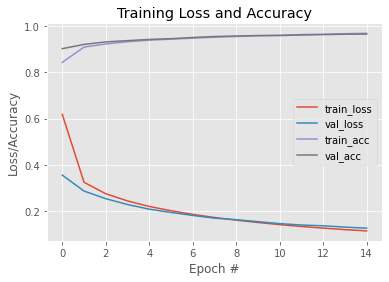

In [10]:
lr = 0.1
b_size = 256
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
27/27 [==============================] - 1s 14ms/step - loss: 1.4750 - accuracy: 0.6347 - val_loss: 0.8919 - val_accuracy: 0.8152
Epoch 2/15
27/27 [==============================] - 0s 8ms/step - loss: 0.7203 - accuracy: 0.8389 - val_loss: 0.6019 - val_accuracy: 0.8567
Epoch 3/15
27/27 [==============================] - 0s 10ms/step - loss: 0.5450 - accuracy: 0.8644 - val_loss: 0.4985 - val_accuracy: 0.8725
Epoch 4/15
27/27 [==============================] - 0s 10ms/step - loss: 0.4695 - accuracy: 0.8780 - val_loss: 0.4428 - val_accuracy: 0.8830
Epoch 5/15
27/27 [==============================] - 0s 9ms/step - loss: 0.4260 - accuracy: 0.8867 - val_loss: 0.4077 - val_accuracy: 0.8877
Epoch 6/15
27/27 [==============================] - 0s 9ms/step - loss: 0.3970 - accuracy: 0.8927 - val_loss: 0.3834 - val_accuracy: 0.8953
Epoch 7/15
27/27 [==============================] - 0s 9ms/step - loss: 0.3758 - accuracy: 0.8971 - val_loss: 0.3643 - val_accuracy: 0.8982
Epoch 8/15
27/27 

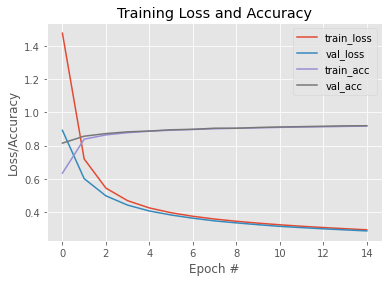

In [11]:
lr = 0.1
b_size = 2048
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

[INFO]: Entrenando red neuronal...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
7/7 [==============================] - 1s 50ms/step - loss: 2.0569 - accuracy: 0.3527 - val_loss: 1.7063 - val_accuracy: 0.6092
Epoch 2/15
7/7 [==============================] - 0s 24ms/step - loss: 1.5204 - accuracy: 0.6729 - val_loss: 1.2919 - val_accuracy: 0.7353
Epoch 3/15
7/7 [==============================] - 0s 23ms/step - loss: 1.1715 - accuracy: 0.7604 - val_loss: 1.0312 - val_accuracy: 0.7793
Epoch 4/15
7/7 [==============================] - 0s 22ms/step - loss: 0.9539 - accuracy: 0.7987 - val_loss: 0.8670 - val_accuracy: 0.8092
Epoch 5/15
7/7 [==============================] - 0s 23ms/step - loss: 0.8164 - accuracy: 0.8213 - val_loss: 0.7605 - val_accuracy: 0.8255
Epoch 6/15
7/7 [==============================] - 0s 21ms/step - loss: 0.7244 - accuracy: 0.8362 - val_loss: 0.6852 - val_accuracy: 0.8388
Epoch 7/15
7/7 [==============================] - 0s 21ms/step - loss: 0.6592 - accuracy: 0.8468 - val_loss: 0.6303 - val_accuracy: 0.8492
Epoch 8/15
7/7 [===========

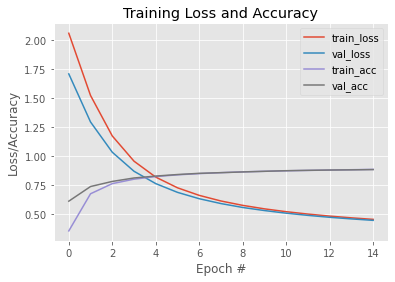

In [12]:
lr = 0.1
b_size = 8192
n_epochs = 15

train_shallow_net(lr, b_size, n_epochs)

**EJERCICIO 5.** Tal y como queda patente en el ejercicio anterior, dar con los **hiperparámetros óptimos** es esencial **para maximizar el performance** del modelo de predicción resultante. Este hecho, deriva en un **proceso empírico** (experimento-evaluación) que conlleva una **gran carga computacional** e **inversión temporal** para dar con estos hiperparámetros óptimos. Este hecho, es el que motiva la aparición de *frameworks* que automatizan estas tareas de entrenar múltiples modelos combinando los distintos posibles valores de los hiperparámetros. En este ejercicio vamos a instroducirnos en la herramienta **Keras Tuner**. 

- Para ello en primer lugar vamos a comprobar los paquetes que tenemos instalados en el **entorno virtual** que nos proporciona **Google Colaboratory** y nos fijaremos si tenemos instalado el paquete Keras Tuner. Para listar los paquetes instalados en el entorno virtual, emplearemos el **gestor de paquetes pip** bajo la instrucción:

In [14]:
!pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.0.

- Como observamos, el entorno de desarrollo que nos ofrece Google Colab trae muchos paquetes por defecto pero no es el caso de la herramienta Keras Tuner. Es por ello que **deberemos instalarla** ejecutando la siguiente instrucción mediante el gestor de paquetes pip:

In [3]:
!pip install -q -U keras-tuner

- Comprobemos que el comando anterior a surtido efecto:

In [16]:
!pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.0.

- Una vez disponemos del framework Keras Tuner, vamos a **modificar la función creada en el apartado anterior** para poder hacer uso de la herramienta de optimización de hiperparámetros. Para ello, en una nueva celda de código, vamos a **definir una nueva funcion** denominada ```build_shallow_net```.  Esta función **tan solo tendá un parámetro de entrada** denominado ```hp```. Dicho parámetro recibirá un objeto de la clase [HyperParameters class](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/#hyperparameters-class) mediante el cual barreremos los posibles valores de los hiperparámetros. Las funcionalidades de la función a definir serán las siguientes:

> 1. Definir los **barridos** de cada **hiperparámetro**:
  
 >>> a) Crear una varible denominada ```hp_learning_rate``` del tipo [HyperParameters.Choice](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/?#choice-method) que barra los valores de learning rate siguientes **[1e-1, 1e-2, 1e-3, 1e-4]**.

 >>> b) Crear una varible denominada ```hp_units``` del tipo [HyperParameters.Int](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/?#int-method) que barra valores de **número de neuronas** de la **hidden layer** en el **rango [128, 512]** en **saltos de 128**.
  
 >>> c) Crear una varible denominada ```hp_activation``` del tipo [HyperParameters.Choice](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/?#choice-method) que barra los **tipos de función de activación** de la **capa oculta** siguientes **['relu', 'tanh', 'sigmoid']**.

> 2. **Definir la arquitectura** de nuestro MLP (incluyendo las variables creadas en el punto 1. como parámetros de entrada a las funciones relacionadas) y **compilar el modelo** (de la misma forma que en el método ```train_shallow_net```) empleando las variables definidas en el punto anterior.

> 3. **Devolver** el objeto Sequential de nuestro **modelo compilado** mediante ```return```.

**Nota**: No incluir en la función ```build_shallow_net``` la evaluación de las muestras de test ni la representación de las gráficas de entrenamiento.


In [16]:
# Imports necesarios
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from kerastuner import HyperParameters as hp


# Con las variables que se proponen el modelo tarda más de 45 minutos (tuve que parar la ejecución), así que simplificamos

def build_shallow_net(hp):
  
  # Definimos los barridos de cada hiperparámetro
  hp_learning_rate = hp.Choice('learning_rate',[1e-2, 1e-3])
  hp_units = hp.Int('units',min_value = 256, max_value = 512, step = 128)
  hp_activation = hp.Choice('dense_activation',['relu','sigmoid'])

  # Implementamos la red empleando Keras
  model = Sequential() 
  model.add(Flatten(input_shape=(28,28))) 
  model.add(Dense(hp_units,activation = hp_activation))
  model.add(Dense(10,activation = 'softmax'))

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  model.compile(optimizer=SGD(lr = hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
 

  # Devolver el modelo compilado
  return model

- Una vez hemos implementado la función tal y como requiere la herramienta Keras Tuner, debemos **instanciar el objeto** que se encargará de definir el proceso **de optimización de hiperparámetros**. Lee detenidamente la documentación relativa a la clase [HyperBand](https://keras-team.github.io/keras-tuner/documentation/tuners/#hyperband-class) y estudia cuidadosamente cada uno de los parámetros de entrada del constructor. 

In [17]:
import kerastuner as kt
from keras.callbacks import TensorBoard
from datetime import datetime

tuner = kt.Hyperband(build_shallow_net,
                     objective = 'val_accuracy', 
                     max_epochs = 30,
                     seed = 42,
                     directory = 'my_dir',
                     project_name = 'kt_mnist')  

In [18]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

- En este momento, nuestro **espacio de búsqueda** de los valores óptimos para nuestros **hiperparámetros** ha quedado definido. Podemos obtener un **resumen** de los mismos mediante:

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}


- Tan solo resta ejecutar el método ```search``` del objeto HyperBand para para **barrer el espacio de búsqueda automáticamente**. Tras dicho proceso, empleando la función ```get_best_hyperparameters``` podemos rescatar los mejores valores para cada hiperparámetro involucrado en la búsqueda automática.

- **Analiza** los **parámetros de entrada** de los métodos detallados anteriormente desde el panel izquierdo de la [documentación](https://keras-team.github.io/keras-tuner/documentation/tuners/#tuners). 

**Nota**: Es interesante **analizar la celda de resultados** mientras se lleva a cabo este proceso (que durará aproximadamente unos 20 minutos). Extrae conclusiones a partir del proceso que observas. 

In [ ]:
# Comenzamos la búsqueda de hiperparámetros óptimos. Cada combinación repercute en un modelo entrenado 50 epochs.
tuner.search(x_tr, y_tr, validation_data = (x_val, y_val),callbacks=[tensorboard_callback])

# Obtener los mejores hiperparámetros y mostrarlos de forma resumida
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the densely-connected
layer is {best_hps.get('units')}, the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')} and the best activation function is {best_hps.get('dense_activation')}.
""")

Trial 116 Complete [00h 01m 00s]
val_accuracy: 0.9054999947547913

Best val_accuracy So Far: 0.9746666550636292
Total elapsed time: 00h 22m 47s

Search: Running Trial #117

Value             |Best Value So Far |Hyperparameter
0.1               |0.01              |learning_rate
128               |512               |units
relu              |relu              |activation
relu              |relu              |dense_activation
10                |30                |tuner/epochs
0                 |10                |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round



[INFO]: Entrenando red neuronal...
Epoch 1/10
   1/1688 [..............................] - ETA: 13:04 - loss: 2.3347 - accuracy: 0.1250

1688/1688 [==============================] - 6s 3ms/step - loss: 0.6531 - accuracy: 0.8414 - val_loss: 0.3798 - val_accuracy: 0.8970
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3450 - accuracy: 0.9051 - val_loss: 0.3101 - val_accuracy: 0.9152
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.9169 - val_loss: 0.2743 - val_accuracy: 0.9242
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2662 - accuracy: 0.9256 - val_loss: 0.2487 - val_accuracy: 0.9297
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2422 - accuracy: 0.9330 - val_loss: 0.2296 - val_accuracy: 0.9347
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2229 - accuracy: 0.9383 - val_loss: 0.2138 - val_accuracy: 0.9392
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2069 - accuracy: 0.9424 - val_loss: 0.2016 - val_accuracy: 0.9448
Epo

In [ ]:
%tensorboard --logdir=logs/fit

- Si queremos un **resumen más completo** de los diferentes **trials** podemos emplear el siguiente comando:

In [ ]:
# Obtener un resumen más completo de los trials
tuner.results_summary()

- Por último, es posible **obtener el modelo** cuya combinación de hiperparámetros ha reportado el mejor performance empleando ```get_best_models``` (analizar en la documentación) y **llevar a cabo la inferencia de las muestras de test** (a desarrollar en la celda inferior por el/la alumno/a) evaluando con ```classification_report```.

In [ ]:
# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Efectuamos predicciones en test
predictions = #???
#???

**EJERCICIO 6.** Esta primera red que habeís desarrollado es una **shallow-net**. A partir de dos capas ocultas en adelante es cuando podemos hablar de redes neuronales profundas. Ahora vamos a realizar una nueva modificación en nuestra función ```train_shallow_net``` (debemos definirla en una nueva celda con las modificaciones). Concretamente, **vamos a darle más profundidad a nuestra red** añadiendo cuatro capas ocultas más, a parte de las que ya tenemos, es decir, nuestra **deep net** estará compuesta por la entrada, **cinco capas ocultas con 512, 256, 128, 64 y 32 neuronas, respectivamente** y la **capa de salida con las 10 neuronas**. Además, vamos a hacer dos modificaciones más y vamos a extraer como parámetros de entrada a la función la capa de activación de las **hidden layers** y el optimizador. Con estos cambios, el nuevo método tendrá la siguiente cabecera:

```
def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer)
```

**Nota**: Copiad y pegad el código de la función ```train_shallow_net``` en una nueva celda, añadid cuatro capas ocultas extras y modificar la función de activación y el optimizador según el parámetro de entrada a la función.

- Tras haber realizado las modificaciones oportunas y disponiendo de la función ```train_deep_net```, llama a dicho método pasándole como parámetros de entrada los siguientes valores: **```learning_rate = 0.005```**, **```batch_size = 128```**, **```num_epochs = 50```**, **```act_function = tf.nn.relu```** y **```optimizer = tf.train.AdamOptimizer```**. ¿Que se puede observar de las curvas de pérdidas de training y validation?¿A que es debido dicho efecto? 

In [ ]:
# Imports necesarios
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import numpy as np

def train_deep_net(learning_rate, batch_size, num_epochs, optimizer):

  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Flatten(input_shape=(28,28))) #Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
  model.add(Dense(512,activation = 'relu'))
  model.add(Dense(256,activation = 'relu'))
  model.add(Dense(128,activation = 'relu'))
  model.add(Dense(64,activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(10,activation = 'softmax'))

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  model.compile(optimizer=optimizer(lr = learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

  # Entrenando la solución
  H = model.fit(x_tr,y_tr,validation_data = (x_val,y_val) , epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x=x_te, batch_size=None)
  print(classification_report(np.argmax(y_te, axis=1),np.argmax(predictions, axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam

train_deep_net(lr, b_size, n_epochs, opt)

**EJERCICIO 7.** Con el objetivo de subsanar el problema anterior, vamos a realizar una **última modificación de nuestra función ```train_deep_net```**. Concretamente, **vamos a añadir una capa de dropout**, despues de cada una de las fully-connected layers (tras aplicar la función de activación). Para ello, será necesario añadir una capa de Dropout que elimine aleatoriamente un porcentaje de neuronas (**```p_drop```**) de una capa. La nueva cabecera de nuestra función quedará de la siguiente manera:
```
def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer, p_drop)
```

- Tras haber realizado las modificaciones oportunas y disponiendo de la nueva versión de la función ```train_deep_net```,  vuelve a llamar a la función con los mismos parámetros de entrada del apartado anterior y con un valor de **```p_drop= 0.25```**.  Posteriormente, en una nueva celda de código, realiza otra ejecución pero esta vez con un valor de **```p_drop= 0.5```**. Comenta los resultados obtenidos. 

In [ ]:
# Imports necesarios
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer, p_drop):

  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Flatten(input_shape=(28,28))) #Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
  model.add(Dense(512,activation = 'relu'))
  model.add(Dropout(p_drop))
  model.add(Dense(256,activation = 'relu'))
  model.add(Dropout(p_drop))
  model.add(Dense(128,activation = 'relu'))
  model.add(Dropout(p_drop))
  model.add(Dense(64,activation = 'relu'))
  model.add(Dropout(p_drop))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dropout(p_drop))
  model.add(Dense(10,activation = 'softmax'))

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  model.compile(optimizer=optimizer(lr = learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

  # Entrenando la solución
  H = model.fit(x_tr,y_tr,validation_data = (x_val,y_val) , epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x=x_te, batch_size=None)
  print(classification_report(np.argmax(y_te, axis=1),np.argmax(predictions, axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

In [ ]:
from tensorflow.keras.optimizers import Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.25
act_func = "relu"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from tensorflow.keras.optimizers import Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.5
act_func = "relu"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

**EJERCICIO 8.** Para finalizar la sesión práctica, vamos a lanzar diversas ejecuciones de nuestra red neuronal profunda para **analizar el comportamiento** del proceso de entrenamiento cuando se emplean **diferentes funciones de activación y optimizadores**.

- En primer lugar, realiza diversas ejecuciones de la red anterior (**```p_drop= 0.25```**) llamando a  ```train_deep_net```  con las siguientes funciones de activación: **```act_function = tanh```**, **```act_function = sigmoid```** , **```act_function = leaky_relu```** , **```act_function = elu```** y **```act_function = selu```**  . ¿Que observas en las diferentes ejecuciones?¿Que función de activación es la que mejor funciona?¿Es muy alto el impacto de la función de activación en la precisión del modelo para esta aplicación?

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.25
act_func = "tanh"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.25
act_func = "sigmoid"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.25
act_func = tf.keras.layers.LeakyReLU(alpha=0.3)

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.25
act_func = "elu"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Adam
p_drop = 0.25
act_func = "selu"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

- Para finalizar, realiza diversas ejecuciones de la red anterior (**```p_drop= 0.25```**) empleando **```act_function = sigmoid```** con los siguientes optimizadores: **```tf.keras.optimizers.SGD```**, **```tf.keras.optimizers.Nadam```** y **```tf.keras.optimizers.RMSprop```**  . Comparalos con la ejecución anterior de **Adam** utilizando la sigmoide.¿Que optimizador proporciona mejores resultados?¿Es muy alto el impacto del optimizador en la precisión del modelo para esta aplicación?¿Que ocurre con SGD?¿Que parámetro deberiamos variar para evitar este comportamiento? 

In [ ]:
from tensorflow.keras.optimizers import SGD

lr = 0.005
b_size = 128
n_epochs = 50
opt = SGD
p_drop = 0.25
act_func = "sigmoid"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from tensorflow.keras.optimizers import Nadam

lr = 0.005
b_size = 128
n_epochs = 50
opt = Nadam
p_drop = 0.25
act_func = "sigmoid"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

lr = 0.005
b_size = 128
n_epochs = 50
opt = RMSprop
p_drop = 0.25
act_func = "sigmoid"

# Instanciando el modelo
model = train_deep_net(lr, b_size, n_epochs, act_func, opt, p_drop)